# Importing Module And Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import pickle as pkl

import warnings
warnings.filterwarnings("ignore")

## Uploading the Pre-Processed Data

In [4]:
df = pd.read_csv('Car_Details_Cleaned_Dataset.csv')

In [6]:
# Creating a copy of dataset
data = df.copy()

In [8]:
# Checking shape of dataset
data.shape

(3145, 9)

In [10]:
# Seprating the categorical and numerical columns
categorical_col = ['Car_Brand', 'Car_Name', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']
numerical_col = ['Year', 'Selling_Price', 'Km_Driven']

## Label-Encoder Method

In [12]:
# Encoding categorical data
label_encoder = {} 
for i in categorical_col:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    label_encoder[i] = le
le

LabelEncoder()

In [14]:
# Viewing the dataset after applying label encoding
data.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,11,4,2007,60000,70000,4,1,1,0
1,11,135,2007,135000,50000,4,1,1,0
2,9,132,2012,600000,100000,1,1,1,0
3,4,101,2017,250000,46000,4,1,1,0
4,8,11,2014,450000,141000,1,1,1,2


## Correlation Checking

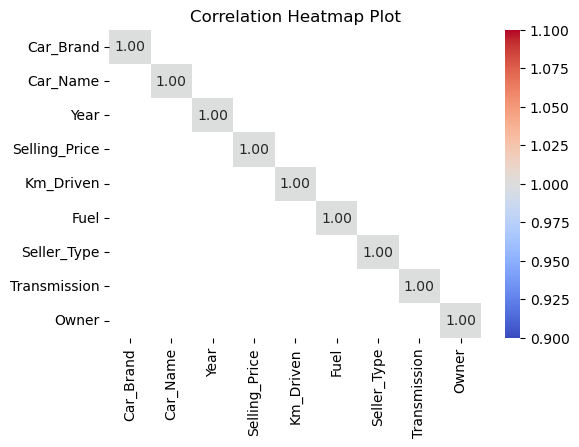

In [17]:
corr = data.corr()
corr = corr[corr>=0.7]
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap Plot")
plt.show()

## Machine Learning Model Building

In [19]:
# Separating Dependent and Independent Variables
x = data.drop(["Selling_Price"], axis=1)
y = data["Selling_Price"]

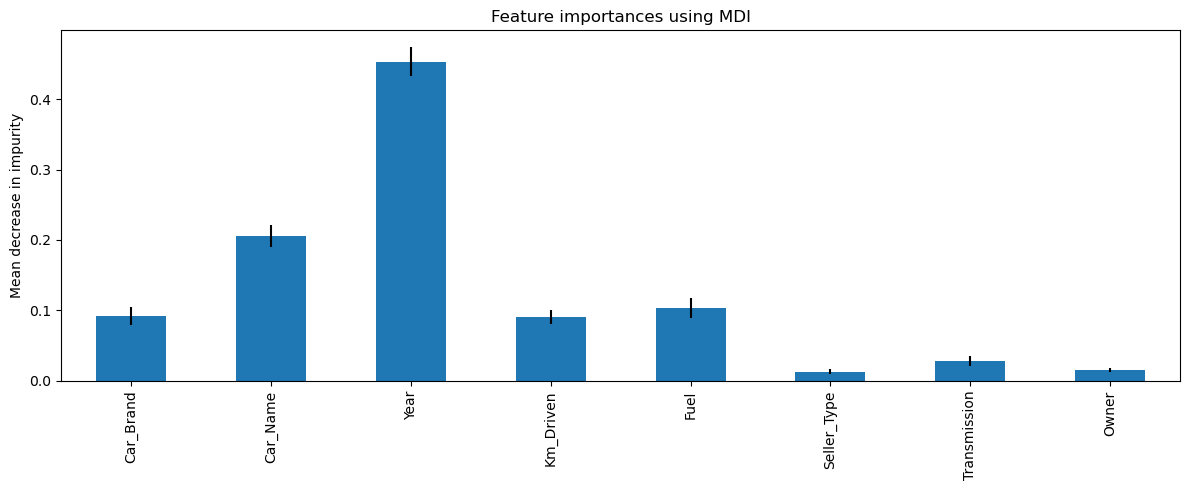

In [22]:
forest = RandomForestRegressor()
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [24]:
# Splitting into Training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
# Standardize numerical column
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 1.20903165e+00, -6.89871284e-02,  1.01306529e+00, ...,
         4.48401595e-01,  2.51236796e-01,  9.15278676e-01],
       [-1.12907277e-03, -7.83884507e-01,  1.01306529e+00, ...,
        -1.96559603e+00,  2.51236796e-01, -6.97746076e-01],
       [-1.12907277e-03,  9.05872933e-01, -6.90674181e-02, ...,
         4.48401595e-01,  2.51236796e-01,  9.15278676e-01],
       ...,
       [-7.27225509e-01, -1.04384719e+00, -2.23333283e+00, ...,
         4.48401595e-01,  2.51236796e-01,  2.52830343e+00],
       [-9.69257655e-01, -5.23921824e-01,  1.55413164e+00, ...,
        -1.96559603e+00,  2.51236796e-01,  1.72179105e+00],
       [-1.12907277e-03, -1.60709967e+00, -3.39600594e-01, ...,
         4.48401595e-01,  2.51236796e-01, -6.97746076e-01]])

In [28]:
# Creating variable to store model evaluation data
model_scores = {}

# Creating  Model Evaluation Function 
def evaluate(model, model_name, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)

    # Calculating Model Evaluation
    training_score = model.score(x_train,y_train)
    testing_score = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Model",model_name)
    print("Training Score",training_score)
    print("Testing Score",testing_score)
    print("Mean Squared Error",mse)
    print("Mean Absolute Error",mae)
    print("R2 Score",r2)
    
    # Storing score of each model in model_scores variable    
    model_scores[model_name] = {'Training Score': training_score,'Testing Score': testing_score,'R² Score': r2}

# 1. Linear Regression

In [30]:
linear = LinearRegression()
linear.fit(x_train,y_train)
evaluate(linear,"Linear Regression",x_train,y_train,x_test,y_test)

Model Linear Regression
Training Score 0.5215746306044677
Testing Score 0.5315308071313605
Mean Squared Error 26580016228.20305
Mean Absolute Error 126703.81003730094
R2 Score 0.5315308071313605


# 2.Lasso Regression

In [32]:
lasso = Lasso()
lasso.fit(x_train,y_train)
evaluate(lasso,"Lasso Regression",x_train,y_train,x_test,y_test)

Model Lasso Regression
Training Score 0.5215746301646691
Testing Score 0.5315287841041504
Mean Squared Error 26580131010.769104
Mean Absolute Error 126703.94133800345
R2 Score 0.5315287841041504


# 3.KNeighbors Regression

In [34]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
evaluate(knn,"KNeighbors Regressor",x_train,y_train,x_test,y_test)

Model KNeighbors Regressor
Training Score 0.4743965987377978
Testing Score 0.20706839681939915
Mean Squared Error 44989372196.146225
Mean Absolute Error 160545.71613723
R2 Score 0.20706839681939915


# 4.Ridge Regression

In [36]:
ridge = Ridge()
ridge.fit(x_train,y_train)
evaluate(ridge,"Ridge Regression",x_train,y_train,x_test,y_test)

Model Ridge Regression
Training Score 0.5215734254065538
Testing Score 0.5314268515252227
Mean Squared Error 26585914463.86127
Mean Absolute Error 126714.42157069372
R2 Score 0.5314268515252227


# Ensemble Techniques

# 5. Decision Tree Regression

In [38]:
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)
evaluate(decision,"Decision Tree",x_train,y_train,x_test,y_test)

Model Decision Tree
Training Score 0.9958075397596032
Testing Score 0.6195240969439005
Mean Squared Error 21587450854.013943
Mean Absolute Error 99574.86637018214
R2 Score 0.6195240969439005


# 6. Random Forest Regression

In [40]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
evaluate(RF,"Random Forest",x_train,y_train,x_test,y_test)

Model Random Forest
Training Score 0.9642484885147
Testing Score 0.7636564511006839
Mean Squared Error 13409665909.315031
Mean Absolute Error 81527.20464279756
R2 Score 0.7636564511006839


# 7. AdaBoost Regression

In [42]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
evaluate(ada,"AdaBoost",x_train,y_train,x_test,y_test)

Model AdaBoost
Training Score 0.4471020811822234
Testing Score 0.4573643492366166
Mean Squared Error 30788074483.558605
Mean Absolute Error 147762.44176129697
R2 Score 0.4573643492366166


# 8. Gradient Boosting Regression

In [44]:
gradient = GradientBoostingRegressor()
gradient.fit(x_train,y_train)
evaluate(gradient,"Gradient Boosting",x_train,y_train,x_test,y_test)

Model Gradient Boosting
Training Score 0.7904690926319811
Testing Score 0.7486623977965552
Mean Squared Error 14260398862.980213
Mean Absolute Error 87041.47434406905
R2 Score 0.7486623977965552


# 9. XGBoost Regression

In [46]:
xgb =XGBRegressor()
xgb.fit(x_train,y_train)
evaluate(xgb,"XGBoost",x_train,y_train,x_test,y_test)

Model XGBoost
Training Score 0.9688721679487646
Testing Score 0.7950412624645368
Mean Squared Error 11628953734.279398
Mean Absolute Error 76916.81705646442
R2 Score 0.7950412624645368


### Retrieving models with their scores

In [48]:
pd.DataFrame(model_scores).T

,Training Score,Testing Score,R² Score
Linear Regression,0.521575,0.531531,0.531531
Lasso Regression,0.521575,0.531529,0.531529
KNeighbors Regressor,0.474397,0.207068,0.207068
Ridge Regression,0.521573,0.531427,0.531427
Decision Tree,0.995808,0.619524,0.619524
Random Forest,0.964248,0.763656,0.763656
AdaBoost,0.447102,0.457364,0.457364
Gradient Boosting,0.790469,0.748662,0.748662
XGBoost,0.968872,0.795041,0.795041


Note: - The XGBoost model achieved the best accuracy at 80%, outperforming Gradient Boosting at 76% and other models, despite showing signs of overfitting. This overfitting is likely due to the imbalanced nature of our dataset. 

# Saving the Model

In [69]:
pkl.dump(xgb,open('app.pkl','wb'))

# Uploading the Model

In [70]:
model = pkl.load(open('app.pkl','rb'))

## Generating Sample Dataset

In [54]:
sample_data = df.sample(n = 20, random_state = 40).reset_index(drop=True)  # Reordering index - just for better visualization.
sample_data.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Honda,City,2010,400000,50000,Petrol,Individual,Manual,First Owner
1,Mahindra,Bolero,2015,320000,50000,Diesel,Individual,Manual,Third Owner
2,Renault,KWID,2016,280000,23000,Petrol,Individual,Manual,First Owner
3,Fiat,Punto,2010,165000,100000,Petrol,Individual,Manual,Fourth & Above Owner
4,Maruti,Swift,2009,270000,120000,Diesel,Individual,Manual,Second Owner


## Saving the Sample Dataset

In [60]:
sample_data.to_csv("Sample_Dataset.csv", index=False)

In [63]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_col' is a list of categorical column names
label_encoder = {}

# Fitting the label encoders on each categorical column
for col in categorical_col:
    label_encoder[col] = LabelEncoder()  # Initialize a new LabelEncoder for each column
    sample_data[col] = sample_data[col].astype(str)  # Convert all values to string to avoid errors
    label_encoder[col].fit(sample_data[col])  # Fit the LabelEncoder

# Applying the transformation
for col in categorical_col:
    sample_data[col] = label_encoder[col].transform(sample_data[col])

# Check the result
sample_data.head()


,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,3,12,2010,400000,50000,1,1,1,0
1,5,11,2015,320000,50000,0,1,1,3
2,7,2,2016,280000,23000,1,1,1,0
3,1,4,2010,165000,100000,1,1,1,1
4,6,6,2009,270000,120000,0,1,1,2


## Generating prediction through Model on Sample Dataset

In [65]:
# Splitting Input and Target variables
sample_x = sample_data.drop(["Selling_Price"], axis=1)
sample_y = sample_data["Selling_Price"]

# Generating predicion using the loaded model
sample_pred = model.predict(sample_x).astype(int)

# Comparing the actual and predicted data 
results = pd.DataFrame({'Actual': sample_y, 'Predicted': sample_pred, 'Difference in %': ((sample_y - sample_pred)/sample_y)*100})
print("\nRandom Predictions on 20 Data Points:")
results


Random Predictions on 20 Data Points:


,Actual,Predicted,Difference in %
0,400000,234522,41.369500
1,320000,280948,12.203750
2,280000,651310,-132.610714
3,165000,371949,-125.423636
4,270000,148332,45.062222
5,490000,256221,47.710000
6,220000,172797,21.455909
7,430000,428591,0.327674
8,950000,463081,51.254632
9,135000,100885,25.270370


In [67]:
# Evaluating the score on model
print('\nMSE :',mean_squared_error(sample_y,sample_pred))
print('MAE :',mean_absolute_error(sample_y,sample_pred))
print('R2 Score :',r2_score(sample_y,sample_pred))


MSE : 51717238555.85
MAE : 173395.55
R2 Score : -0.055727917630421064


In [71]:
import pickle

# Attempt to load the model
try:
    with open('app.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully.


## Conclusion:

1)- Using different machine learning models would lead to different values of mean absolute error, mean squared error and r2 score respectively.

2)- Remove the outliers from the data as it would completely change some of the important predictions and lead to an increase in the error respectively.

3)- Ensuring the dataset is free from missing and duplicate values is crucial. Missing values can be handled either by dropping or imputing them, depending on the dataset's structure. Addressing this issue is important to avoid errors during model training